<a href="https://colab.research.google.com/github/JANANI-B-S/Weather_analysis/blob/main/Weather__Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas matplotlib seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df=pd.read_csv('/content/sample_data/weather_data.csv')
df.head()

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622


In [18]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
print("Missing values in each column:\n", df.isnull().sum())
print("\nSummary statistics:\n", df.describe())
df['Year'] = df['Date_Time'].dt.year
df['Month'] = df['Date_Time'].dt.month
df['Day'] = df['Date_Time'].dt.day
df['Hour'] = df['Date_Time'].dt.hour


Missing values in each column:
 Location            0
Date_Time           0
Temperature_C       0
Humidity_pct        0
Precipitation_mm    0
Wind_Speed_kmh      0
dtype: int64

Summary statistics:
                            Date_Time   Temperature_C    Humidity_pct  \
count                        1000000  1000000.000000  1000000.000000   
mean   2024-03-10 10:40:58.896321792       14.779705       60.021830   
min              2024-01-01 00:00:06      -19.969311       30.000009   
25%    2024-02-04 16:28:23.750000128        2.269631       45.008500   
50%              2024-03-10 11:43:28       14.778002       60.018708   
75%       2024-04-14 03:51:32.500000       27.270489       75.043818   
max              2024-05-18 19:44:10       39.999801       89.999977   
std                              NaN       14.482558       17.324022   

       Precipitation_mm  Wind_Speed_kmh  
count    1000000.000000  1000000.000000  
mean           5.109639       14.997598  
min            0.000009   

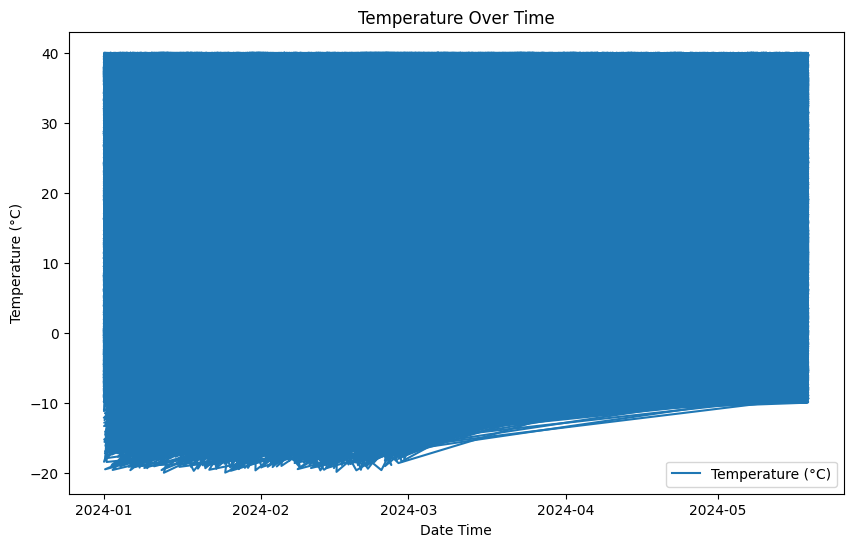

In [22]:

import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(10, 6))
plt.plot(df['Date_Time'], df['Temperature_C'], label='Temperature (°C)')
plt.title('Temperature Over Time')
plt.xlabel('Date Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


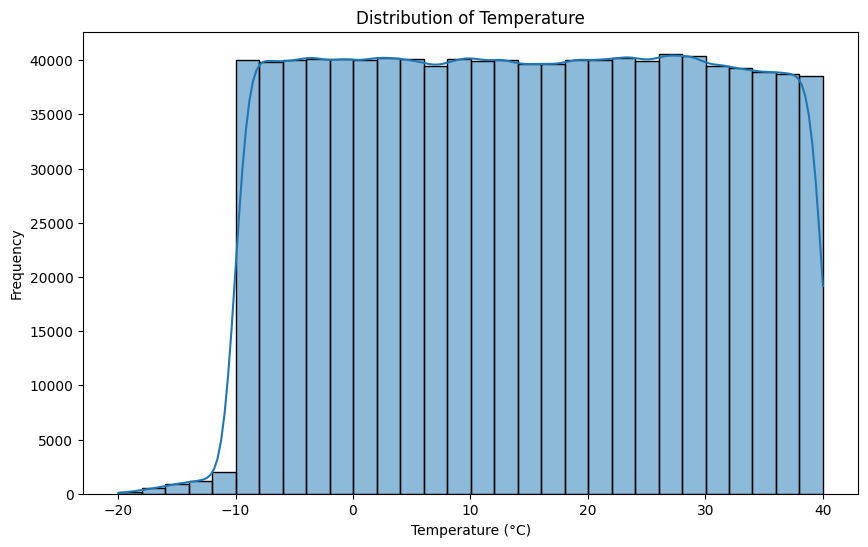

In [23]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature_C'], bins=30, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


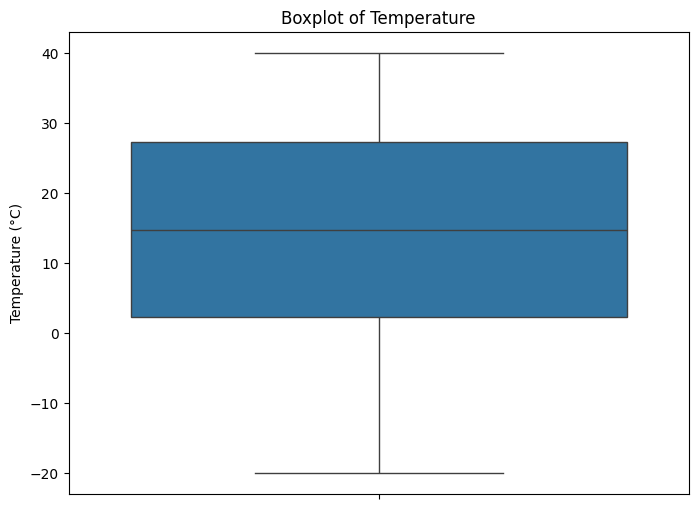

In [24]:

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Temperature_C'])
plt.title('Boxplot of Temperature')
plt.ylabel('Temperature (°C)')
plt.show()


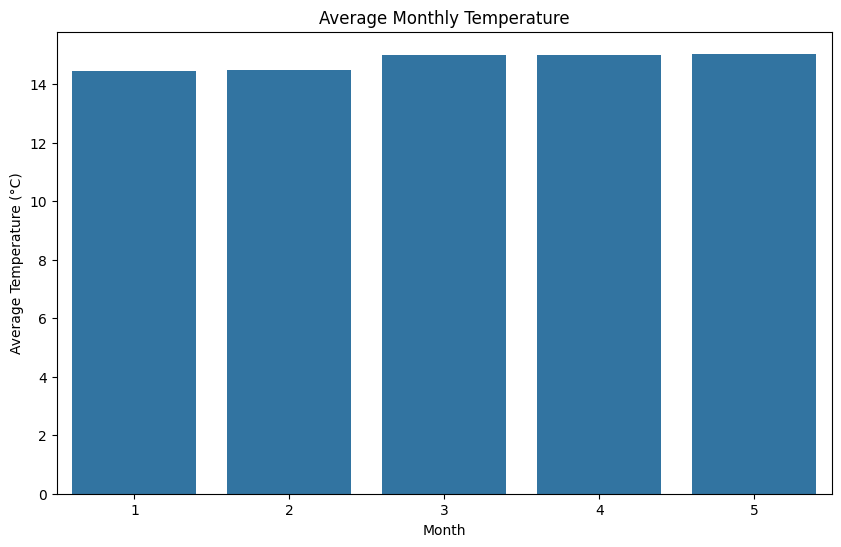

In [25]:

monthly_avg = df.groupby('Month')['Temperature_C'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Temperature_C', data=monthly_avg)
plt.title('Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.show()


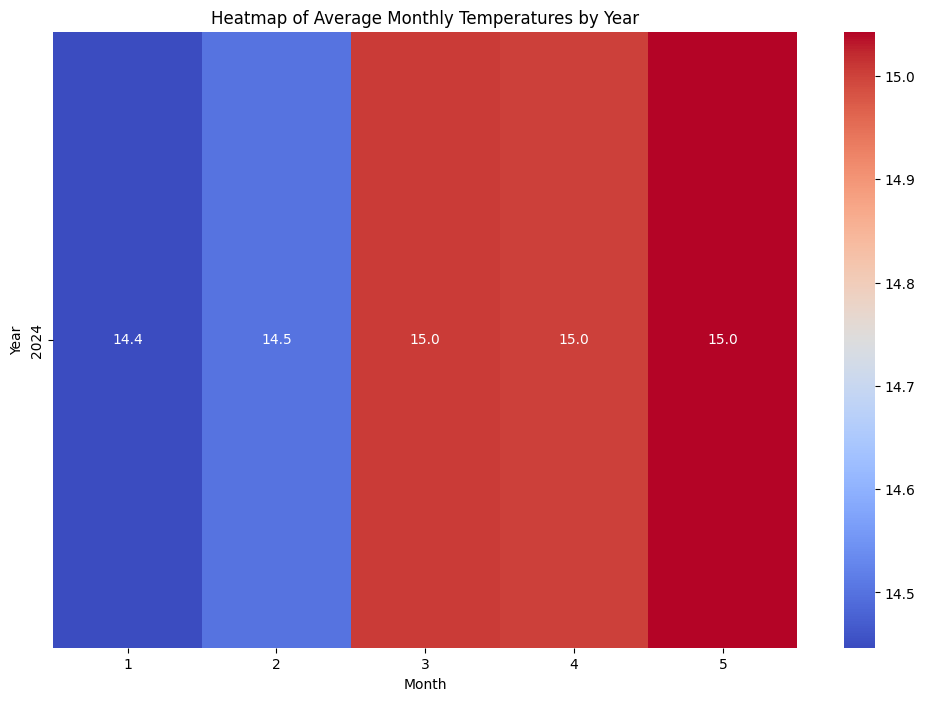

In [26]:

df_pivot = df.pivot_table(values='Temperature_C', index='Year', columns='Month', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, annot=True, fmt=".1f", cmap="coolwarm")
plt.title('Heatmap of Average Monthly Temperatures by Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()
